# Obtención y carga del DataSet

Para empezar con esta actividad, se nos solicitó obtener el dataset "Breast Cancer Wisconsin" del repositorio UCI Machine Learning disponible en el siguiente enlace:

https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29

Comenzamos cargando el DataSet utilizando ``pandas``.

In [70]:
import pandas as pd
import numpy as np

col_names = ['sample_code', 'clump_thickness', 'uniformity_cell_size', 
            'uniformity_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size',
            'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv('breast-cancer-wisconsin.csv', names = col_names)
print(df.shape)
df.head()

(699, 11)


,sample_code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Conteo de los valores faltantes por variable

In [51]:
# Los valores faltantes aparecen señalizados como ?, los sustituimos por el valor
# nan de numpy
df[df == '?'] = np.nan
# Obtenemos los valores faltantes por variable
for col in col_names[:-1]:
    print(f'Valores faltantes en {col}: {df[col].isnull().sum()}')

Valores faltantes en sample_code: 0
Valores faltantes en clump_thickness: 0
Valores faltantes en uniformity_cell_size: 0
Valores faltantes en uniformity_cell_shape: 0
Valores faltantes en marginal_adhesion: 0
Valores faltantes en single_epithelial_cell_size: 0
Valores faltantes en bare_nuclei: 16
Valores faltantes en bland_chromatin: 0
Valores faltantes en normal_nucleoli: 0
Valores faltantes en mitoses: 0


De la salida anterior, podemos ver como el Dataset contiene 16 valores faltantes en la columna ``bare_nuclei``.

# Estrategias de eliminación de valores faltantes

A continuación vamos a emplear varias técnicas de elimnación en caso de valores perdidos. En concreto, plantearemos una primera estrategia en la que eliminaremos las filas con valores faltantes, y una segunda estrategia en la que eliminaremos completamente la columna con valores faltantes.

## Eliminación de filas

In [52]:
df_rows = df.dropna(axis = 0)
df_rows.head()

,sample_code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Eliminación de columnas

In [53]:
df_cols = df.dropna(axis = 1)
df_cols.head()

,sample_code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2


En principio, el enfoque consistente en eliminar las filas con valores nulos parece más razonable que eliminar completamente la columna. En este caso, únicamente tenemos 16 valores perdidos del total de 699 que contiene el dataset (es decir, alrededor del 2% de datos perdidos), por lo que una estrategia de imputación de los valores resulta más factible que en casos extremos en los que tuviésemos una mayoría de los datos perdidos. Por otra parte, la eliminación de las filas, si bien no es ideal, no resulta una pérdida demasiado significativa de información. 

# Estrategias de imputación de valores faltantes

A continuación vamos a emplear algunas estrategias que nos permiten reemplazar los valores perdidos en nuestro DataFrame. Utilizaremos desde las técnicas más simples que suponen sustituir los valores perdidos por una constante, hasta las técnicas multivariantes más complejas estudiadas en sesiones de teoría.

## Imputación con ``fillna()`` y un valor constante 

In [54]:
# bare_nuclei es una variable con valores entre 1 y 10, rellenamos con el valor 
# constante 1.
df_fillna_c = df.fillna(1)
df_fillna_c.head()

,sample_code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Imputación con ``interpolate()``

In [55]:
# Rellenamos los valores faltantes utilizando interpolación lineal
df_interp = df.interpolate(method = 'linear')
df_interp.head()

,sample_code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Imputación con ``SimpleImputer``

In [56]:
from sklearn.impute import SimpleImputer
# Rellenamos los valores faltantes utilizando SimpleImputer y strategy = mean, 
# es decir, los valores faltantes se sustituyen por la media de la variable dónde
# se encuentren los valores perdidos.
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(df)
df_si = pd.DataFrame(imputer.transform(df), columns = col_names)
df_si.head()

,sample_code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


## Imputación multivariante con ``IterativeImputer``

In [57]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

iterative_imputer = IterativeImputer(missing_values = np.nan)
iterative_imputer.fit(df)
df_ii = pd.DataFrame(iterative_imputer.transform(df), columns = col_names)
df_ii.head()

,sample_code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


## Imputación multivariante con ``KNNImputer``

In [58]:
knn_imputer = KNNImputer(missing_values = np.nan)
knn_imputer.fit(df)
df_knn = pd.DataFrame(knn_imputer.transform(df), columns = col_names)
df_knn.head()

,sample_code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


# Comparación gráfica de los resultados

In [64]:
# Agrupamos la columna 'bare_nuclei' de todos los DataFrames obtenidos en un 
# nuevo dataframe que pasaremos a dibujar

dfs = [df, df_rows, df_fillna_c, df_interp, df_si, df_ii, df_knn]
dfs_names = ['original', 'del_rows', 'fillna_1', 
             'interp_linear', 'simple_imputer',
             'iterative_imputer', 'knn_imputer']
col = 'bare_nuclei'
df_graph = pd.DataFrame({x:y[col] for (x, y) in zip(dfs_names, dfs)})
df_graph = df_graph.astype(float)
df_graph.head()

,original,del_rows,fillna_1,interp_linear,simple_imputer,iterative_imputer,knn_imputer
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>


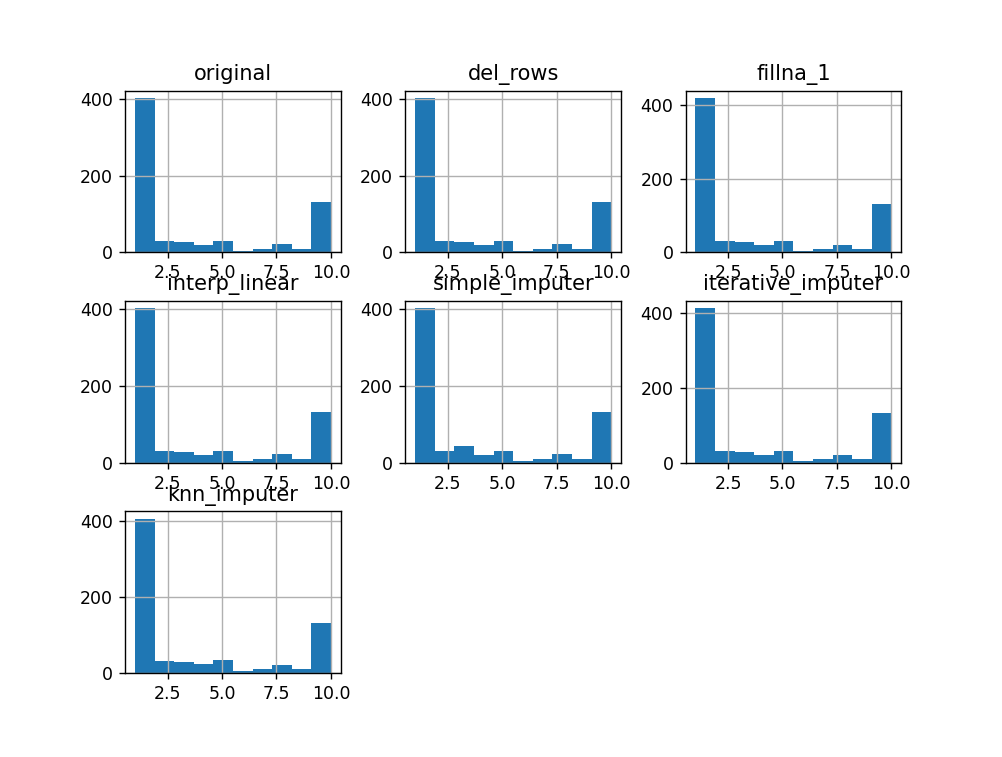

In [67]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Dibujamos un histograma
df_graph.hist()
plt.show()

<IPython.core.display.Javascript object>


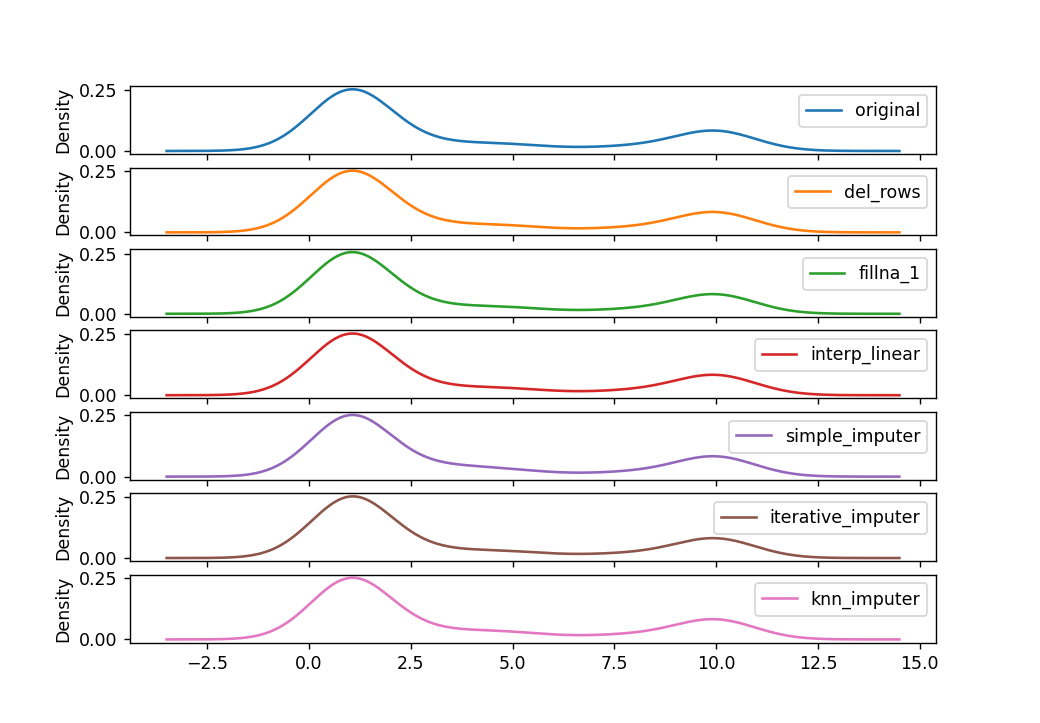

In [68]:
# Dibujamos un gráfico de densidad
df_graph.plot(kind = 'density', subplots = True, sharex = True)
plt.show()

Teniendo en cuenta que únicamente tenemos 16 datos perdidos, el impacto visual sobre la distribución de los datos es muy poco significativo, hasta el punto de que resulta difícil de distinguir observando las gráficas anteriores. En caso de tener un porcentaje más alto de datos faltantes, la aplicación de estas estrategías si que podría tener "feedback" visual más significativo en las gráficas dibujadas.